In [641]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [642]:
df = pd.read_csv('insurance_claims.csv')

In [643]:
df.shape

(1000, 40)

In [644]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [645]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [646]:
df.drop(['policy_number','incident_location'],axis=1,inplace=True)

In [647]:
df.police_report_available.unique()

array(['YES', '?', 'NO'], dtype=object)

In [648]:
df.replace('?',np.NaN,inplace=True)

In [649]:
df

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,...,NaN,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,1991-07-16,OH,500/1000,1000,1310.80,0,431289,FEMALE,...,NaN,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,2014-01-05,IL,100/300,1000,1436.79,0,608177,FEMALE,...,NaN,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,2003-02-17,OH,250/500,500,1383.49,3000000,442797,FEMALE,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,MALE,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [650]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage                 360
bodily_injuries                   0
witnesses                   

In [651]:
df.drop(['_c39'],axis=1,inplace=True)

In [652]:
df.collision_type.unique()

array(['Side Collision', nan, 'Rear Collision', 'Front Collision'],
      dtype=object)

In [653]:
df['collision_type'] = df['collision_type'].fillna(df['collision_type'].mode()[0])

In [654]:
df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode()[0])

In [655]:
df.police_report_available.unique()

array(['YES', nan, 'NO'], dtype=object)

In [656]:
df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available'].mode()[0])

In [657]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_cla

In [658]:
df['policy_bind_date']=pd.to_datetime(df['policy_bind_date'])

In [659]:
df['Month'] = pd.DatetimeIndex(df['policy_bind_date']).month

In [660]:
df['Year'] = pd.DatetimeIndex(df['policy_bind_date']).year

In [661]:
df['Day'] = df['policy_bind_date'].dt.day

In [662]:
df

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Month,Year,Day
0,328,48,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,...,6510,13020,52080,Saab,92x,2004,Y,10,2014,17
1,228,42,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,...,780,780,3510,Mercedes,E400,2007,Y,6,2006,27
2,134,29,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,7700,3850,23100,Dodge,RAM,2007,N,9,2000,6
3,256,41,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,6340,6340,50720,Chevrolet,Tahoe,2014,Y,5,1990,25
4,228,44,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,1300,650,4550,Accura,RSX,2009,N,6,2014,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,1991-07-16,OH,500/1000,1000,1310.80,0,431289,FEMALE,...,17440,8720,61040,Honda,Accord,2006,N,7,1991,16
996,285,41,2014-01-05,IL,100/300,1000,1436.79,0,608177,FEMALE,...,18080,18080,72320,Volkswagen,Passat,2015,N,1,2014,5
997,130,34,2003-02-17,OH,250/500,500,1383.49,3000000,442797,FEMALE,...,7500,7500,52500,Suburu,Impreza,1996,N,2,2003,17
998,458,62,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,MALE,...,5220,5220,36540,Audi,A5,1998,N,11,2011,18


In [663]:
df.drop(['policy_bind_date'],axis=1,inplace=True)

In [664]:
df

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Month,Year,Day
0,328,48,OH,250/500,1000,1406.91,0,466132,MALE,MD,...,6510,13020,52080,Saab,92x,2004,Y,10,2014,17
1,228,42,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,...,780,780,3510,Mercedes,E400,2007,Y,6,2006,27
2,134,29,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,...,7700,3850,23100,Dodge,RAM,2007,N,9,2000,6
3,256,41,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,...,6340,6340,50720,Chevrolet,Tahoe,2014,Y,5,1990,25
4,228,44,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,...,1300,650,4550,Accura,RSX,2009,N,6,2014,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,...,17440,8720,61040,Honda,Accord,2006,N,7,1991,16
996,285,41,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,...,18080,18080,72320,Volkswagen,Passat,2015,N,1,2014,5
997,130,34,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,...,7500,7500,52500,Suburu,Impreza,1996,N,2,2003,17
998,458,62,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,...,5220,5220,36540,Audi,A5,1998,N,11,2011,18


In [665]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00
age,1000.0,3.894800e+01,9.140287e+00,19.00,32.0000,38.0,44.000,64.00
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.0,0.000,10000000.00
insured_zip,1000.0,5.012145e+05,7.170161e+04,430104.00,448404.5000,466445.5,603251.000,620962.00
capital-gains,1000.0,2.512610e+04,2.787219e+04,0.00,0.0000,0.0,51025.000,100500.00
capital-loss,1000.0,-2.679370e+04,2.810410e+04,-111100.00,-51500.0000,-23250.0,0.000,0.00
incident_hour_of_the_day,1000.0,1.164400e+01,6.951373e+00,0.00,6.0000,12.0,17.000,23.00
number_of_vehicles_involved,1000.0,1.839000e+00,1.018880e+00,1.00,1.0000,1.0,3.000,4.00


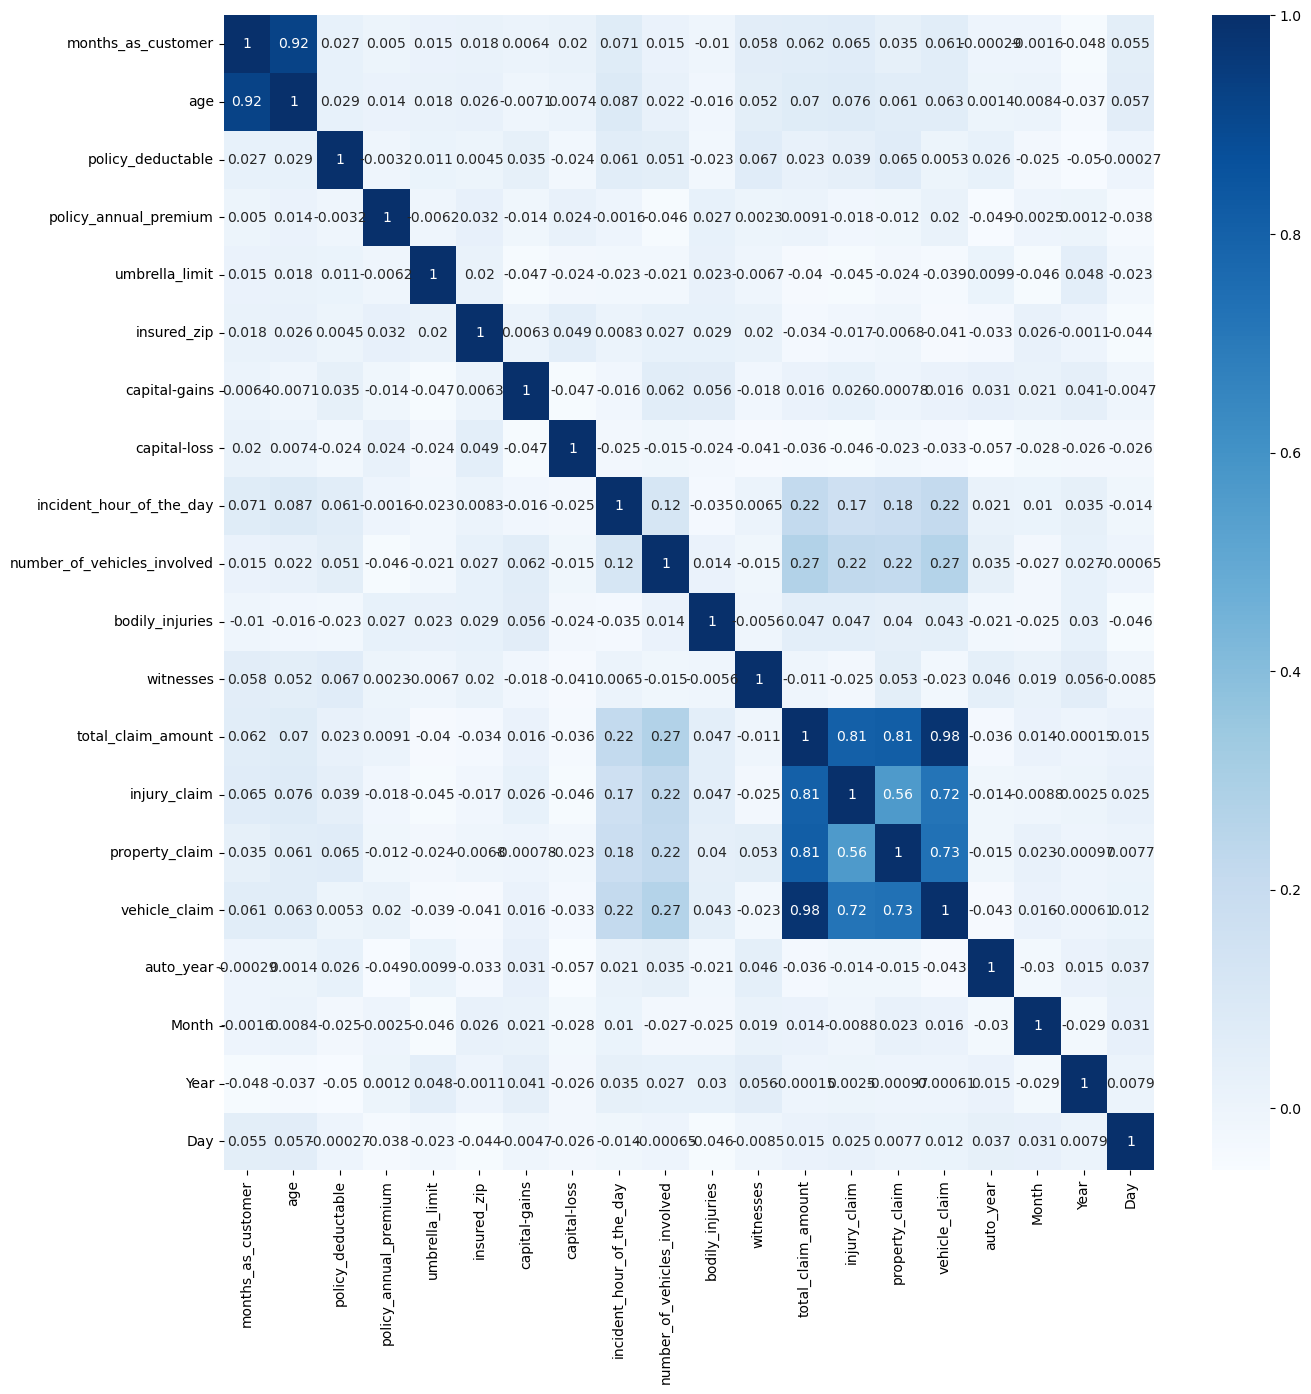

In [666]:
cor=df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(cor, annot=True, cmap='Blues')
plt.show()

In [667]:
df.drop(columns = ['age', 'total_claim_amount'], inplace = True, axis = 1)

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

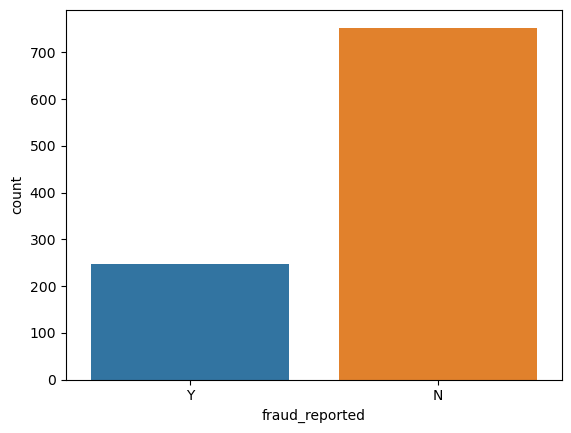

In [668]:
# df['fraud_reported'].value_counts().plot.pie(figsize = (5,5), autopct = '%.1f%%')
sns.countplot(x=df['fraud_reported'])

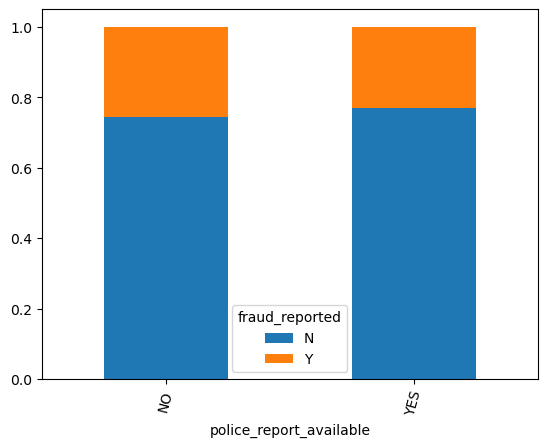

In [669]:
ct = pd.crosstab(df.police_report_available, df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

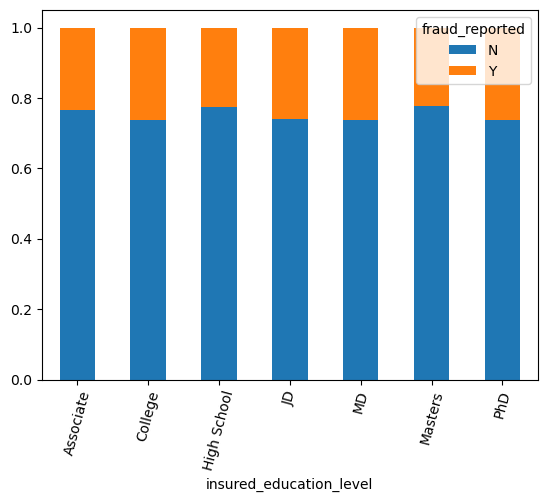

In [670]:
ct = pd.crosstab(df.insured_education_level, df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

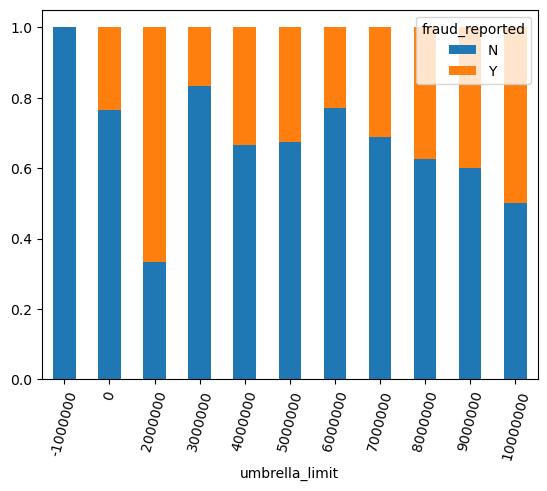

In [671]:
ct = pd.crosstab(df.umbrella_limit , df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

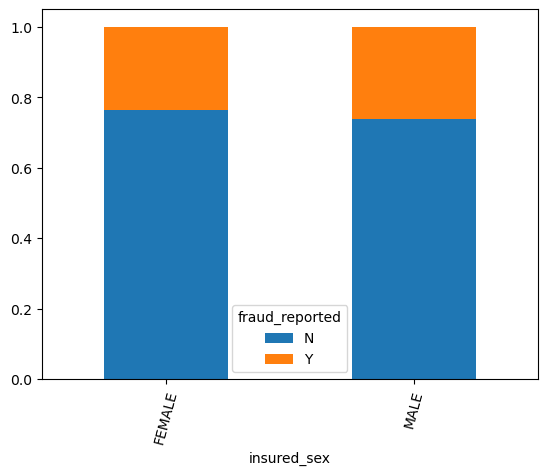

In [672]:
ct = pd.crosstab(df.insured_sex, df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

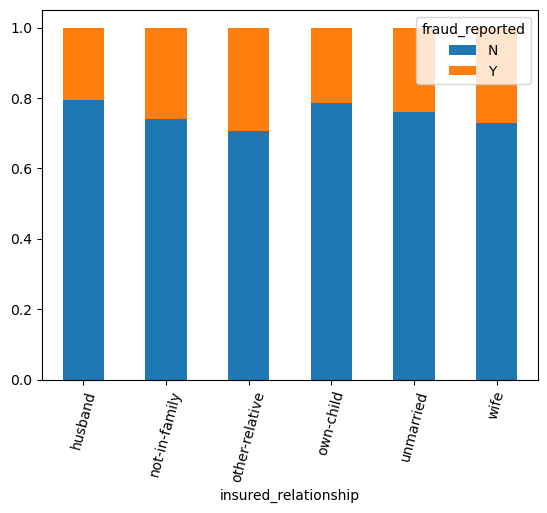

In [673]:
ct = pd.crosstab(df.insured_relationship, df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

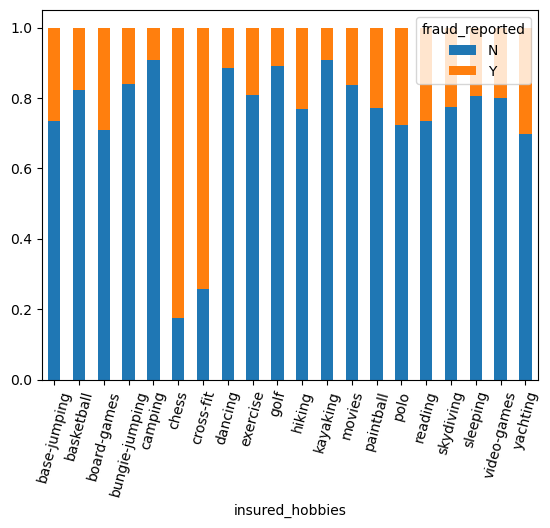

In [674]:
ct = pd.crosstab(df.insured_hobbies, df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

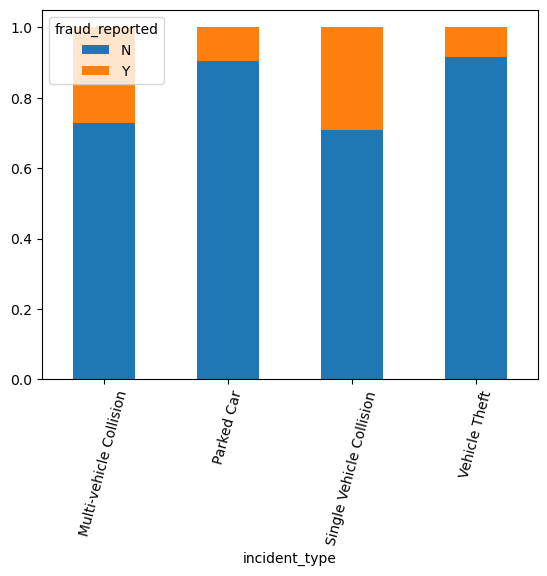

In [675]:
ct = pd.crosstab(df.incident_type, df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

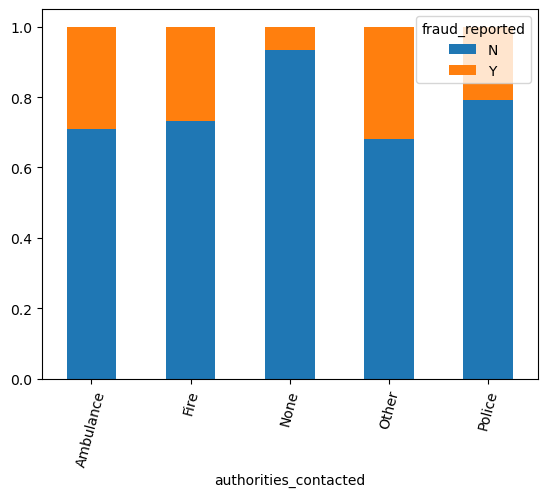

In [676]:
ct = pd.crosstab(df.authorities_contacted, df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

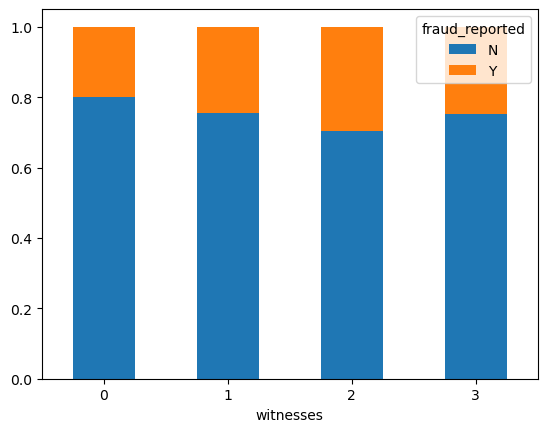

In [677]:
ct = pd.crosstab(df.witnesses, df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=360)
plt.show()

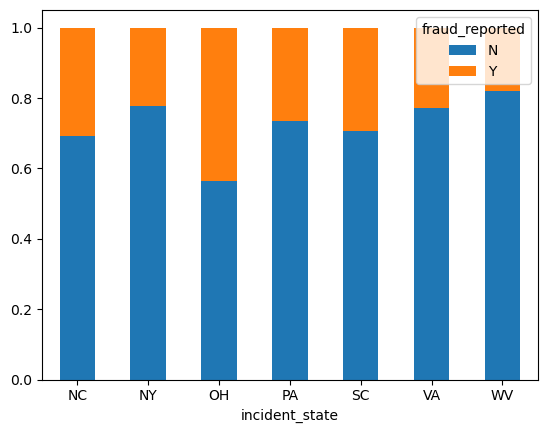

In [678]:
ct = pd.crosstab(df.incident_state, df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=360)
plt.show()

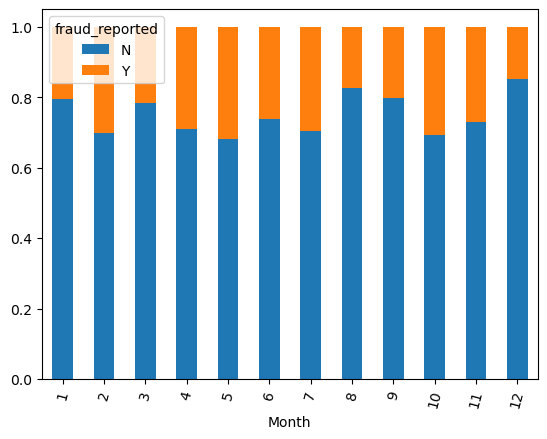

In [679]:
ct = pd.crosstab(df.Month, df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

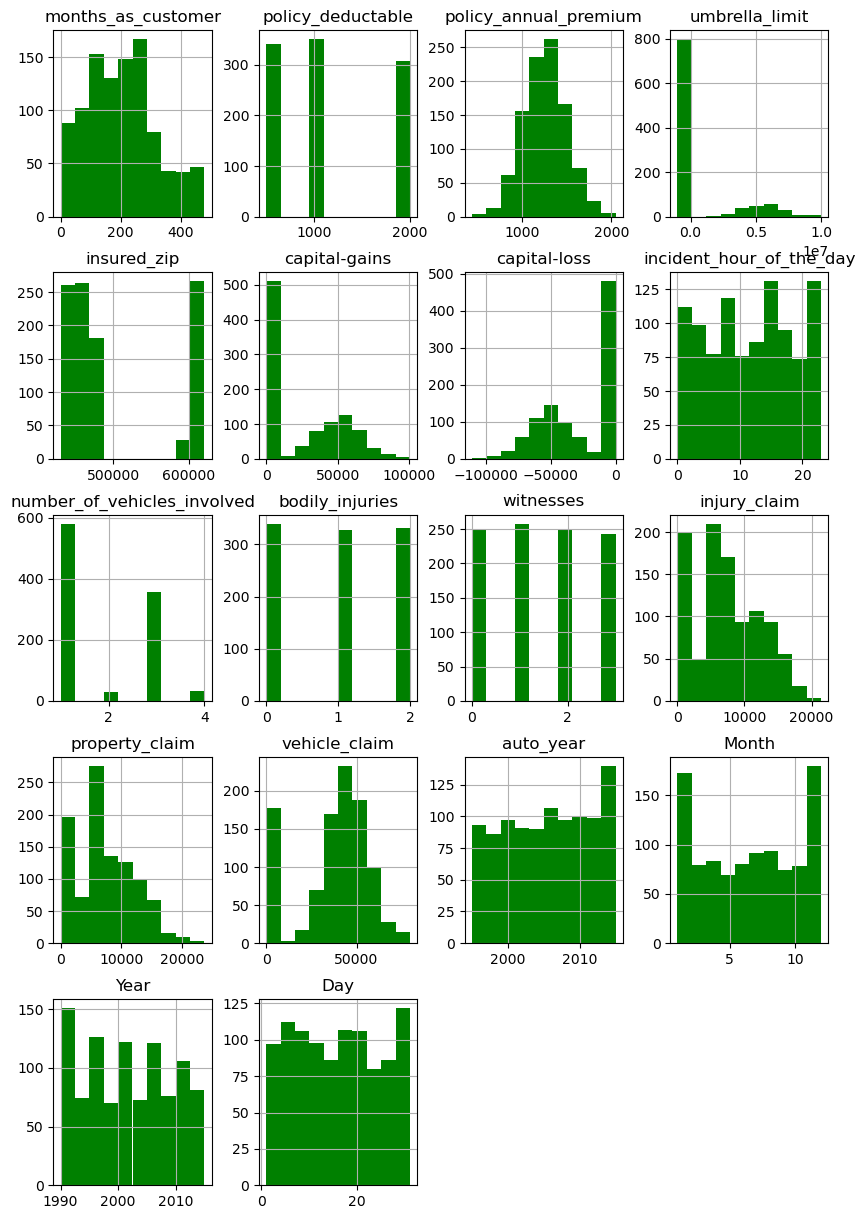

In [680]:
df.hist(figsize=(10,15),color = 'green');

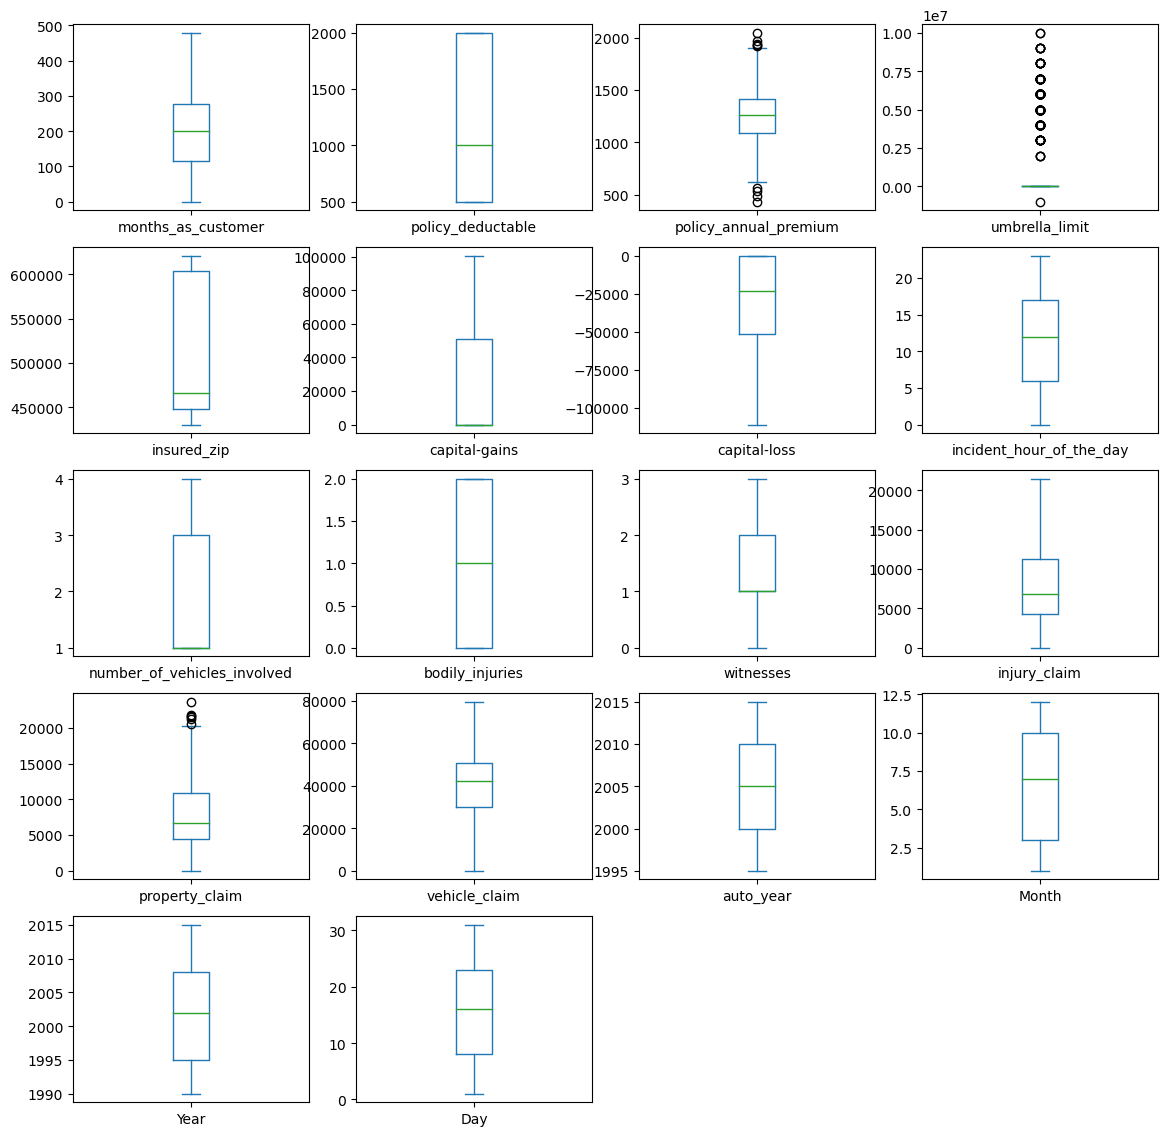

In [681]:
df.plot(kind='box',subplots=True,layout=(5,4),figsize=(14,14))
plt.show()

In [682]:
df[df["property_claim"]>20000]

,months_as_customer,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Month,Year,Day
163,112,OH,500/1000,1000,1166.54,0,479852,FEMALE,Masters,prof-specialty,...,10790,21580,75530,Dodge,Neon,1997,Y,9,2002,13
299,119,IN,250/500,2000,1097.64,0,614812,MALE,High School,transport-moving,...,7080,21240,35400,Accura,TL,2006,N,8,1997,5
301,107,IL,100/300,2000,1018.73,5000000,469646,MALE,Associate,handlers-cleaners,...,14420,21630,57680,Honda,CRV,2001,N,11,1994,25
421,147,IN,250/500,1000,1306.78,0,466818,MALE,MD,prof-specialty,...,13520,20280,47320,Toyota,Camry,1995,N,10,1992,2
500,1,OH,500/1000,500,854.58,0,612826,FEMALE,JD,craft-repair,...,7890,23670,55230,Honda,CRV,2003,N,5,2006,24
591,43,IL,500/1000,500,1320.39,0,604861,FEMALE,Associate,armed-forces,...,7270,21810,50890,Honda,CRV,1996,Y,11,1997,7
687,194,IL,250/500,500,1203.81,0,613119,MALE,JD,transport-moving,...,13700,20550,61650,Saab,95,1999,N,2,1993,15
745,258,IL,100/300,500,1042.25,0,601206,MALE,Masters,exec-managerial,...,6770,20310,54160,Mercedes,C300,2008,Y,2,2001,15


In [683]:
df.loc[(df["vehicle_claim"] == 55230 )& (df['property_claim']==23670), 'property_claim']=21810
df[df["umbrella_limit"]>6000000]

,months_as_customer,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Month,Year,Day
31,166,IL,100/300,2000,1337.28,8000000,610393,MALE,JD,craft-repair,...,7460,7460,52220,Ford,F150,2006,Y,6,2008,19
48,175,IN,500/1000,1000,1123.87,8000000,446326,FEMALE,PhD,protective-serv,...,810,810,5670,Volkswagen,Passat,1995,N,1,2008,7
50,430,OH,250/500,2000,1326.62,7000000,477310,MALE,MD,other-service,...,16360,8180,57260,Nissan,Pathfinder,1998,N,1,2004,10
66,107,IN,250/500,500,1239.22,7000000,476458,FEMALE,High School,tech-support,...,13800,13800,62100,Audi,A5,2009,Y,8,2011,17
88,31,IL,500/1000,2000,1318.24,9000000,601748,FEMALE,College,prof-specialty,...,940,470,3290,Dodge,Neon,2002,N,8,1999,15
115,258,IN,100/300,1000,1110.37,10000000,455365,MALE,MD,machine-op-inspct,...,4770,9540,33390,Accura,MDX,1997,Y,3,1999,9
119,245,OH,250/500,500,964.79,8000000,460675,FEMALE,Associate,adm-clerical,...,13240,6620,52960,BMW,3 Series,2010,N,4,2001,21
154,101,OH,100/300,1000,1053.04,7000000,619540,FEMALE,Masters,other-service,...,9040,9040,36160,Saab,93,2013,Y,6,2012,23
157,428,IN,250/500,500,1344.36,7000000,473329,FEMALE,JD,prof-specialty,...,1300,650,4550,Saab,92x,2013,N,9,1999,29
161,278,IN,500/1000,2000,1142.62,7000000,475588,FEMALE,MD,farming-fishing,...,11700,11700,52650,Chevrolet,Silverado,1997,N,7,1999,24


In [684]:
df.skew()

months_as_customer             0.362177
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
injury_claim                   0.264811
property_claim                 0.368941
vehicle_claim                 -0.621098
auto_year                     -0.048289
Month                         -0.016994
Year                           0.052511
Day                            0.053237
dtype: float64

In [685]:
columns=['umbrella_limit','insured_zip']

In [686]:
for i in columns:
    df[i]=np.cbrt(df[i])

In [687]:
df.skew()

months_as_customer             0.362177
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.523380
insured_zip                    0.794586
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
injury_claim                   0.264811
property_claim                 0.368941
vehicle_claim                 -0.621098
auto_year                     -0.048289
Month                         -0.016994
Year                           0.052511
Day                            0.053237
dtype: float64

In [688]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [689]:
for i in df.columns:
    if df[i].dtypes==object:
        df[i]=le.fit_transform(df[i])

In [690]:
x=df.drop(['fraud_reported'],axis=1)
y=df['fraud_reported']
y=pd.DataFrame(data=y)

In [691]:
x.shape,y.shape

((1000, 36), (1000, 1))

In [692]:
from imblearn.over_sampling import SMOTE

In [693]:
SM=SMOTE()
X,Y=SM.fit_resample(x,y)
y_new=pd.DataFrame(data=Y)
x_new=pd.DataFrame(data=X)

In [694]:
x_new.shape,y_new.shape

((1506, 36), (1506, 1))

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

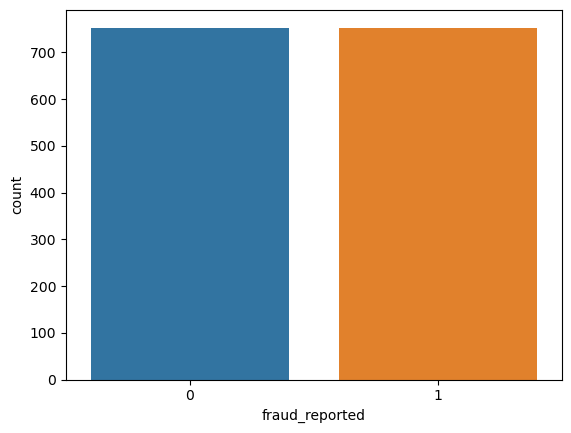

In [695]:
sns.countplot(x=y_new['fraud_reported'])

In [696]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc_x=sc.fit_transform(x_new)
sc_x=pd.DataFrame(sc_x,columns=x_new.columns)

In [697]:
sc_x

,months_as_customer,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,...,police_report_available,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,Month,Year,Day
0,1.107186,1.344484,0.247480,-0.263883,0.674484,-0.554915,-0.505880,1.27964,0.632948,-1.171527,...,1.784190,-0.241279,1.154699,0.708134,0.963350,-1.733806,-0.157265,1.129612,1.816233,0.145443
1,0.202709,0.088409,0.247480,1.454837,-0.234204,1.977873,-0.472448,1.27964,0.632948,-0.128014,...,-0.560478,-1.498910,-1.513987,-2.074970,0.434535,-0.677142,0.373371,-0.100020,0.662546,1.349603
2,-0.647500,1.344484,-1.064861,1.454837,0.701482,1.977873,-1.102792,-0.78147,1.719856,1.176377,...,-0.560478,0.019904,-0.844635,-0.952445,-0.623097,1.051943,0.373371,0.822204,-0.202719,-1.179133
3,0.455962,-1.167666,0.247480,1.454837,0.712749,2.136574,1.617015,-0.78147,1.719856,-1.432405,...,-0.560478,-0.278591,-0.301741,0.630205,-0.887504,1.436184,1.611522,-0.407428,-1.644827,1.108771
4,0.202709,-1.167666,1.559821,-0.263883,1.441511,2.136574,1.652484,1.27964,-1.540870,1.176377,...,-0.560478,-1.384779,-1.542331,-2.015377,-1.680728,1.148004,0.727128,-0.100020,1.816233,-1.179133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501,-0.321888,-1.167666,0.247480,-0.470129,-0.374853,-0.554915,-0.582133,-0.78147,-0.453961,0.915499,...,-0.560478,-0.126709,-0.626605,-0.460403,-1.151912,1.244064,0.019614,0.822204,-0.779562,0.867939
1502,-0.475649,1.344484,0.247480,0.585165,0.247639,-0.554915,-0.938321,1.27964,-0.453961,0.393742,...,-0.560478,-0.325340,0.019199,0.023503,1.227758,-0.581082,-0.334143,0.207388,1.095179,0.988355
1503,2.219693,0.088409,0.247480,-0.263883,-0.465449,0.428984,0.734295,-0.78147,-0.997416,-0.128014,...,1.784190,0.271870,2.629235,0.875968,1.227758,-1.061383,-0.687900,1.129612,-0.923773,-1.299549
1504,0.021813,-1.167666,0.247480,-0.263883,-0.158897,-0.554915,-0.460174,-0.78147,0.089493,1.437255,...,-0.560478,0.218536,-0.746086,-0.388662,-0.623097,1.244064,-0.334143,0.207388,-0.923773,0.627107


In [698]:
from sklearn.decomposition import PCA

In [699]:
testPCA=PCA()
Y=testPCA.fit(sc_x)

In [700]:
var_cumu=np.cumsum(Y.explained_variance_ratio_)*100
var_cumu

array([  8.20070234,  12.85800087,  17.43916523,  21.23951041,
        24.90543247,  28.43079285,  31.82673201,  35.18438823,
        38.42394706,  41.56482019,  44.6988482 ,  47.79348608,
        50.7875106 ,  53.68529044,  56.53187498,  59.32502031,
        62.0804076 ,  64.73973532,  67.29208735,  69.81125044,
        72.27772764,  74.66584311,  77.0075805 ,  79.32575571,
        81.60608313,  83.82783658,  86.02654029,  88.13086511,
        90.22263541,  92.20169138,  94.14521103,  96.03375375,
        97.74563728,  99.0182112 ,  99.59008355, 100.        ])

In [701]:
FinalPCA=PCA(n_components=32)
final_x=FinalPCA.fit_transform(sc_x)
finalx=pd.DataFrame(final_x)

In [702]:
finalx

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.326864,0.349214,2.714022,-2.517836,-0.133089,-0.267432,-1.800134,0.845146,-0.772229,0.880710,...,1.580457,1.193891,0.694453,-0.696224,0.486212,-1.293096,-0.252512,-0.782814,0.036585,1.501679
1,3.733916,-0.661562,-0.526309,0.473332,1.176431,-1.174939,0.185019,1.234634,-0.743979,0.564777,...,-0.317941,-0.081028,0.012385,-0.394985,-0.215881,-0.595860,0.432783,-1.142656,-0.712160,-0.068858
2,0.367666,1.416837,-0.806004,2.234549,-0.145854,0.948305,-0.082522,-0.706849,-0.090082,0.214038,...,-0.176673,-0.447073,-0.844650,-0.253178,0.301667,-0.817803,-0.870013,0.315410,0.021245,-1.242722
3,0.237261,-2.690395,-1.335649,2.970355,1.952956,1.473105,-0.742753,0.362876,-1.780896,0.060856,...,0.086193,0.908261,-0.669664,1.534107,-0.008243,0.173501,-0.799385,0.317293,1.098465,-0.173811
4,3.020200,-0.712579,-0.960633,2.738184,-1.597211,2.099718,0.256186,-1.587889,-0.152772,1.396966,...,1.688194,1.248413,0.421301,2.188480,1.036188,0.643217,2.378639,0.095249,-0.025948,0.415833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501,0.520737,-1.156919,-1.475667,-0.274747,1.068920,-0.680779,1.233517,-0.710470,-0.454762,-2.493448,...,1.139411,0.104513,0.606212,1.067904,-0.138074,-0.379136,-0.624536,-0.379854,0.033189,-0.166745
1502,0.584138,0.187154,-0.149573,-2.034893,0.836063,-0.435997,-0.069541,0.163102,0.118696,1.181431,...,-0.104771,0.886736,0.527171,-0.515106,0.660812,0.885325,1.752804,-0.112153,-0.645317,-0.306707
1503,-2.314243,-0.179217,0.581555,-0.823593,-0.871864,1.410672,0.366981,1.984261,0.271593,-0.579810,...,0.739526,1.317873,0.769842,-0.386842,-1.547699,-1.080047,-0.172531,-0.136461,0.119241,1.257918
1504,0.486190,-2.097496,-1.036991,-0.240962,1.358192,-0.579912,0.703281,-0.531783,-0.000767,-1.788931,...,0.562380,-0.430740,0.075124,0.546552,-0.574021,-0.174221,-0.186941,0.059174,-0.264885,-0.004974


In [703]:
x=finalx
x

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.326864,0.349214,2.714022,-2.517836,-0.133089,-0.267432,-1.800134,0.845146,-0.772229,0.880710,...,1.580457,1.193891,0.694453,-0.696224,0.486212,-1.293096,-0.252512,-0.782814,0.036585,1.501679
1,3.733916,-0.661562,-0.526309,0.473332,1.176431,-1.174939,0.185019,1.234634,-0.743979,0.564777,...,-0.317941,-0.081028,0.012385,-0.394985,-0.215881,-0.595860,0.432783,-1.142656,-0.712160,-0.068858
2,0.367666,1.416837,-0.806004,2.234549,-0.145854,0.948305,-0.082522,-0.706849,-0.090082,0.214038,...,-0.176673,-0.447073,-0.844650,-0.253178,0.301667,-0.817803,-0.870013,0.315410,0.021245,-1.242722
3,0.237261,-2.690395,-1.335649,2.970355,1.952956,1.473105,-0.742753,0.362876,-1.780896,0.060856,...,0.086193,0.908261,-0.669664,1.534107,-0.008243,0.173501,-0.799385,0.317293,1.098465,-0.173811
4,3.020200,-0.712579,-0.960633,2.738184,-1.597211,2.099718,0.256186,-1.587889,-0.152772,1.396966,...,1.688194,1.248413,0.421301,2.188480,1.036188,0.643217,2.378639,0.095249,-0.025948,0.415833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501,0.520737,-1.156919,-1.475667,-0.274747,1.068920,-0.680779,1.233517,-0.710470,-0.454762,-2.493448,...,1.139411,0.104513,0.606212,1.067904,-0.138074,-0.379136,-0.624536,-0.379854,0.033189,-0.166745
1502,0.584138,0.187154,-0.149573,-2.034893,0.836063,-0.435997,-0.069541,0.163102,0.118696,1.181431,...,-0.104771,0.886736,0.527171,-0.515106,0.660812,0.885325,1.752804,-0.112153,-0.645317,-0.306707
1503,-2.314243,-0.179217,0.581555,-0.823593,-0.871864,1.410672,0.366981,1.984261,0.271593,-0.579810,...,0.739526,1.317873,0.769842,-0.386842,-1.547699,-1.080047,-0.172531,-0.136461,0.119241,1.257918
1504,0.486190,-2.097496,-1.036991,-0.240962,1.358192,-0.579912,0.703281,-0.531783,-0.000767,-1.788931,...,0.562380,-0.430740,0.075124,0.546552,-0.574021,-0.174221,-0.186941,0.059174,-0.264885,-0.004974


In [704]:
y=y_new

In [705]:
x.shape,y.shape

((1506, 32), (1506, 1))

In [706]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve,roc_auc_score

In [707]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    mod=LogisticRegression()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best Accuracy is',maxAccu,' on Random state',maxRS)

Best Accuracy is 0.8112582781456954  on Random state 130


In [708]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=130)

In [709]:
from xgboost import XGBClassifier
lg=LogisticRegression()
sv=SVC(probability=True)
knn=KNeighborsClassifier(n_neighbors=5)
rfc=RandomForestClassifier(n_estimators=100)
dtc=DecisionTreeClassifier()
gnb=GaussianNB()
adc=AdaBoostClassifier(n_estimators=100)
model=[lg,sv,knn,rfc,dtc,gnb,adc]

Test=[]

for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print('Accuracy score of',m)
    print(accuracy_score(y_test,pred))
    Test.append(acc)
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print('-------------------------------------------------------------------------------------------')

Accuracy score of LogisticRegression()
0.8112582781456954
[[131  34]
 [ 23 114]]
              precision    recall  f1-score   support

           0       0.85      0.79      0.82       165
           1       0.77      0.83      0.80       137

    accuracy                           0.81       302
   macro avg       0.81      0.81      0.81       302
weighted avg       0.81      0.81      0.81       302

-------------------------------------------------------------------------------------------
Accuracy score of SVC(probability=True)
0.8311258278145696
[[144  21]
 [ 30 107]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       165
           1       0.84      0.78      0.81       137

    accuracy                           0.83       302
   macro avg       0.83      0.83      0.83       302
weighted avg       0.83      0.83      0.83       302

-------------------------------------------------------------------------------------------

In [710]:
cv=[]
for m in model:
    score=cross_val_score(m,x,y,cv=5)
    cv.append(score.mean())
    print('Mean Accuracy of', m)
    print(score.mean())
    print('-------------------------------------------------------------------------------')

Mean Accuracy of LogisticRegression()
0.748445578755143
-------------------------------------------------------------------------------
Mean Accuracy of SVC(probability=True)
0.8122219533123584
-------------------------------------------------------------------------------
Mean Accuracy of KNeighborsClassifier()
0.6740071725594596
-------------------------------------------------------------------------------
Mean Accuracy of RandomForestClassifier()
0.8088776924600118
-------------------------------------------------------------------------------
Mean Accuracy of DecisionTreeClassifier()
0.6920133770434094
-------------------------------------------------------------------------------
Mean Accuracy of GaussianNB()
0.7810081186332534
-------------------------------------------------------------------------------
Mean Accuracy of AdaBoostClassifier(n_estimators=100)
0.7637345712965612
-------------------------------------------------------------------------------


In [711]:
from sklearn.metrics import roc_auc_score

In [712]:
from sklearn.metrics import roc_curve

In [713]:
Performance={'Model':['LogisticRegression','SVC','KNeighborsClassifier','RandomForestClassifier','DecisionTreeClassifier','GaussianNB','AdaBoostClassifier'],
           'Test Score':Test,'Cross Validation Score':cv,'ROC AUC Score':roc_auc_score}
Performance=pd.DataFrame(data=Performance)
Performance

,Model,Test Score,Cross Validation Score,ROC AUC Score
0,LogisticRegression,0.811258,0.748446,<function roc_auc_score at 0x0000024005DD0160>
1,SVC,0.831126,0.812222,<function roc_auc_score at 0x0000024005DD0160>
2,KNeighborsClassifier,0.625828,0.674007,<function roc_auc_score at 0x0000024005DD0160>
3,RandomForestClassifier,0.844371,0.808878,<function roc_auc_score at 0x0000024005DD0160>
4,DecisionTreeClassifier,0.701987,0.692013,<function roc_auc_score at 0x0000024005DD0160>
5,GaussianNB,0.821192,0.781008,<function roc_auc_score at 0x0000024005DD0160>
6,AdaBoostClassifier,0.791391,0.763735,<function roc_auc_score at 0x0000024005DD0160>


In [714]:
from sklearn.model_selection import GridSearchCV

In [715]:
sv.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [716]:
# param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

In [717]:
# grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
# grid.fit(x_train,y_train)
# print(grid.best_params_)

In [718]:
final_svc=SVC(C= 10, gamma= 0.1, kernel= 'rbf',probability=True)
final_svc.fit(x_train,y_train)


SVC(C=10, gamma=0.1, probability=True)

In [719]:
pred2=final_svc.predict(x_test)
acc2=accuracy_score(y_test,pred2)
print("accuracy score",acc2*100)
cvs2=cross_val_score(final_svc,x,y,cv=5)
print('Cross Validation Score',cvs2.mean()*100)
y_pred_svc=final_svc.predict_proba(x_test)[:,1]
fpr_svc,tpr_svc,thresholds=roc_curve(y_test,y_pred_svc)
auc_score2=roc_auc_score(y_test,final_svc.predict(x_test))


accuracy score 89.40397350993378
Cross Validation Score 90.11792919847747


In [720]:
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [721]:
#  parameters = {'max_depth': [10, 20, 30, 40, None],
#               'max_features': ['auto', 'sqrt'],
#               'min_samples_leaf': [1, 2, 4],
#               'min_samples_split': [2, 5, 10],
#               'n_estimators': [5, 10, 20, 30, 50,100],
#              'criterion':['gini', 'entropy']}

In [722]:
# GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=3)
# GCV.fit(x_train,y_train)
# GCV.best_params_

Random Forest classifier and SVC after Hypertuning
-----------------------------------------------
Accuracy Score of randomforest 84.43708609271523
Cross Validation Score of randomforest 81.08710479417395
ROC AUC score of randomforest 84.39504534395046
-----------------------------------------------
Accuracy score of SVC 89.40397350993378
Cross Validation Score of SVC 90.11792919847747
ROC AUC score of SVC 88.63083388630835


AUC ROC Curve


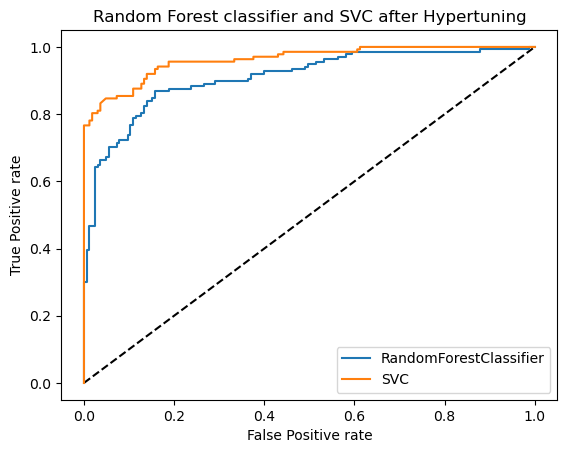

In [723]:
Finalmod=RandomForestClassifier(criterion='gini', max_depth= None , max_features= 'sqrt', min_samples_leaf= 1, min_samples_split=5,n_estimators=100)
Finalmod.fit(x_train,y_train)
pred1=Finalmod.predict(x_test)
acc1=accuracy_score(y_test,pred1)

cvs1=cross_val_score(Finalmod,x,y,cv=5)
y_pred_prob=Finalmod.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
auc_score1=roc_auc_score(y_test,Finalmod.predict(x_test))

print('Random Forest classifier and SVC after Hypertuning')
print('-----------------------------------------------')
print('Accuracy Score of randomforest',acc1*100)
print('Cross Validation Score of randomforest',cvs1.mean()*100)
print("ROC AUC score of randomforest",auc_score1*100)
print('-----------------------------------------------')
print("Accuracy score of SVC",acc2*100)
print('Cross Validation Score of SVC',cvs2.mean()*100)
print("ROC AUC score of SVC",auc_score2*100)
print('\n')
print('AUC ROC Curve')
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='RandomForestClassifier',)
plt.plot(fpr_svc,tpr_svc,label='SVC',)
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('Random Forest classifier and SVC after Hypertuning')
plt.legend()
plt.show()